Dallin Nielson\
DSC 530 - Data Exploration and Analysis

<h1 style="text-align: center;">Final Project</h1>

### 1. Select 5 variables. Describe them, and include Histograms and Descriptive Statistics.

In [1]:
import numpy as np
import pandas as pd
import session_tunes
import matplotlib.pyplot as plt
from scipy import stats

# Read in the tunes.json data
tunes = pd.read_json('tunes.json')
session_tunes.set_display_options()

#### 1. The `tabs` variable
A *tab* (short for *tablature*) refers to the written musical notation, or sheet music, for a tune. On *TheSession.org*, the web page for a tune can have multiple *tabs* that are submitted by different authors, and which have slightly different arrangements of the tune.

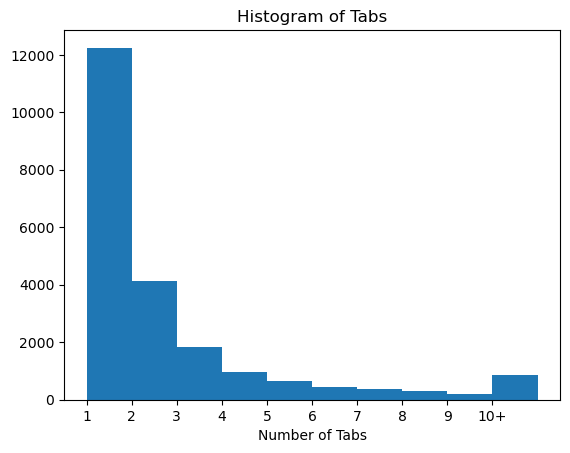

In [2]:
tab_bins = np.arange(1, 12, 1)
plt.hist([np.clip(tunes['tabs'], tab_bins[0], tab_bins[-1])], bins=tab_bins)
xlabels = [str(i) for i in tab_bins][:-1]
xlabels[-1] += "+"
plt.xticks(tab_bins[:-1], xlabels)
plt.xlabel("Number of Tabs")
plt.title("Histogram of Tabs")
plt.show()

The historgram shows that the distribution of `tabs` is heavily right-skewed.

In [3]:
# Create a function to get summary statistics for the columns
def describe_variable(df_column):
    mean = df_column.mean()
    median = df_column.median()
    modes = list(df_column.mode())[0]
    minimum = df_column.min()
    maximum = df_column.max()
    variance = df_column.var()
    std = df_column.std()
    
    return mean, median, modes, minimum, maximum, variance, std

def print_description(sum_stats, name):
    values = [round(float(stat), 2) for stat in sum_stats]
    stats = ["Mean", "Median", "Modes", "Minimum", "Maximum", "Variance", "Standard Deviation"]
    
    print(f'{"Summary of the " + name + " variable":^38}')
    
    for i in range(len(stats)):
        print(f"{stats[i]:28}{values[i]:10.2f}")

In [4]:
tab_stats = describe_variable(tunes['tabs'])
print_description(tab_stats, "Tabs")

     Summary of the Tabs variable     
Mean                              2.49
Median                            1.00
Modes                             1.00
Minimum                           0.00
Maximum                          33.00
Variance                          9.03
Standard Deviation                3.01


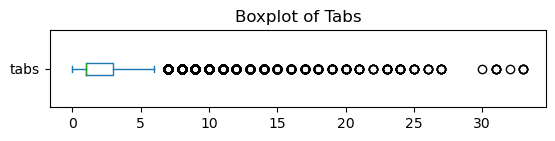

In [5]:
# Use a boxplot to detect outliers in the tabs column
plt.figure().set_figheight(1)
tunes['tabs'].plot.box(vert=False)
plt.title('Boxplot of Tabs')
plt.show()

Any tune with more than 6 tabs is an outlier in the data. However, these are likely to be important to the analysis, since my hypothesis is interested in whether tunes with more tabs are more popular.

#### 2. The `type` variable

In Traditional Irish music, tunes are classified by type, and tunes of the same type share certain characteristics like tempo and time signature. For instance, *Reels* are fast tunes in 4/4 time, while *Jigs* are iin 6/8 time and have a "bouncy" feel to them. The `type` variable specifies which of these groupings the tune falls under.

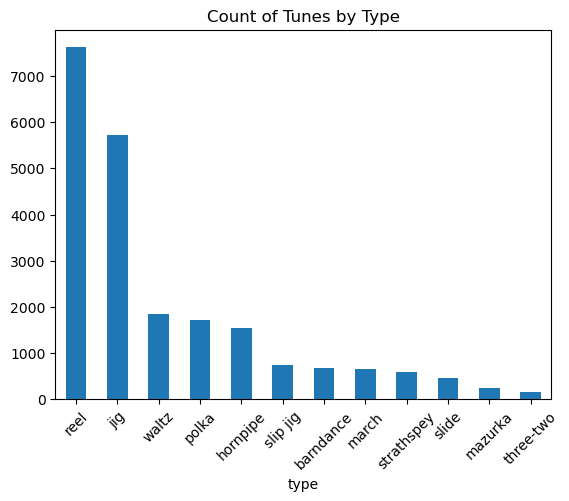

In [6]:
tunes['type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Count of Tunes by Type')
plt.show()

#### 3. The `recordings` variable

On *TheSession.org*, users can catalogue tunes that are recorded as part of a track on an album. The `recordings` variable is a count of how many times the tune has been recorded in an album.

The boxplot shows that all of the tunes with recordings are outliers

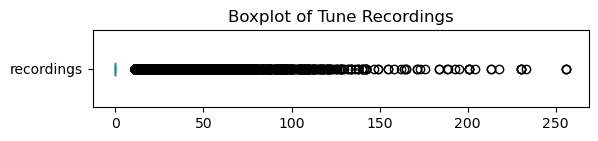

87.271% of tunes don't have any recordings.


In [7]:
plt.figure().set_figheight(1)
tunes['recordings'].plot.box(vert=False)
plt.title('Boxplot of Tune Recordings')
plt.show()

no_recordings = len(tunes[tunes['recordings']==0])

print(f"{round(no_recordings / len(tunes) * 100, 3)}% of tunes don't",
     "have any recordings.")

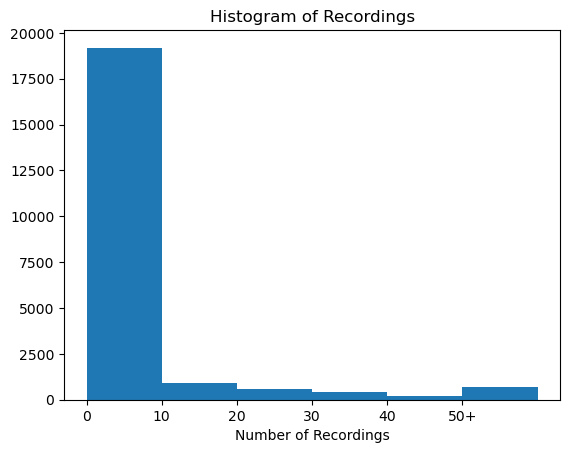

In [8]:
rec_bins = np.arange(0, 70, 10)
plt.hist([np.clip(tunes['recordings'], rec_bins[0], rec_bins[-1])], bins=rec_bins)
xlabels = [str(i) for i in rec_bins][:-1]
xlabels[-1] += "+"
plt.xticks(rec_bins[:-1], xlabels)
plt.xlabel("Number of Recordings")
plt.title("Histogram of Recordings")
plt.show()

It turns out that all of the observations with recordings are outliers due to the fact that the vast majority of tunes in the database have zero recordings. I cannot remove the outliers, because doing so would leave me with nothing to analyse.

In [9]:
recording_stats = describe_variable(tunes['recordings'])
print_description(recording_stats, "Recordings")

  Summary of the Recordings variable  
Mean                              4.90
Median                            0.00
Modes                             0.00
Minimum                           0.00
Maximum                         256.00
Variance                        297.79
Standard Deviation               17.26


#### 4. The `sets` variable.
In traditional Irish music, it is rare for a single tune to be played by itself in isolation. Instead, tunes are most often played in **sets**, which are groups of 2 or more tunes of the same tune type played one after another. On *TheSession.org*, users can create **sets** by grouping multiple tunes together in their desired order. The `sets` variable indicates how many **sets** a particular tune has been added to.

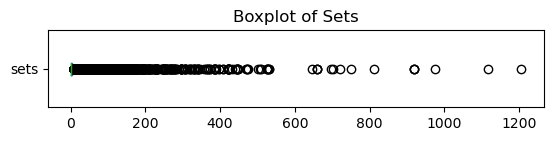

In [10]:
plt.figure().set_figheight(1)
tunes['sets'].plot.box(vert=False)
plt.title('Boxplot of Sets')
plt.show()

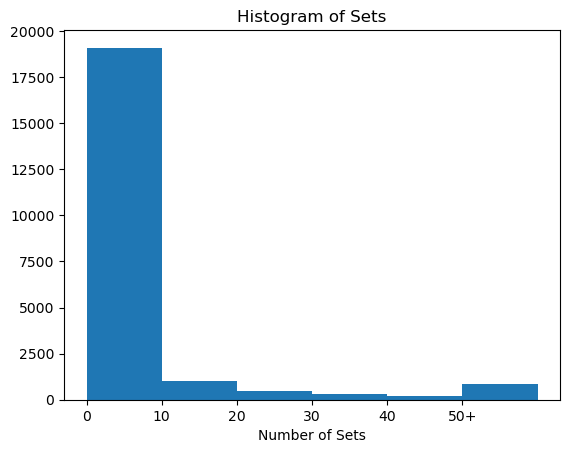

In [11]:
set_bins = np.arange(0, 70, 10)
plt.hist([np.clip(tunes['sets'], set_bins[0], set_bins[-1])], bins=set_bins)
xlabels = [str(i) for i in set_bins][:-1]
xlabels[-1] += "+"
plt.xticks(set_bins[:-1], xlabels)
plt.xlabel("Number of Sets")
plt.title("Histogram of Sets")
plt.show()

In [12]:
set_stats = describe_variable(tunes['sets'])
print_description(set_stats, 'Sets')

     Summary of the Sets variable     
Mean                              8.65
Median                            0.00
Modes                             0.00
Minimum                           0.00
Maximum                        1206.00
Variance                       1557.46
Standard Deviation               39.46


#### 5. The `books` variable.

On *TheSession.org*, site users can add a tune to their **tunebook**, which the user can access to view all tunes that they have added to it. The **tunebook** feature helps users keep track of tunes that they know, as well as tunes that they are learning or wish to learn. The `books` variable is an integer that shows how many users have added a tune to their **tunebook**.

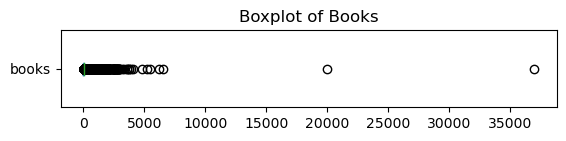

In [13]:
plt.figure().set_figheight(1)
tunes['books'].plot.box(vert=False)
plt.title("Boxplot of Books")
plt.show()

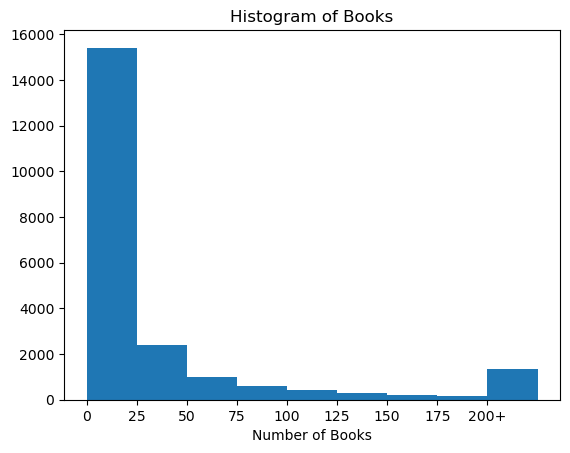

In [14]:
book_bins = np.arange(0, 250, 25)
plt.hist([np.clip(tunes['books'], book_bins[0], book_bins[-1])], bins=book_bins)
xlabels = [str(i) for i in book_bins][:-1]
xlabels[-1] += "+"
plt.xticks(book_bins[:-1], xlabels)
plt.xlabel("Number of Books")
plt.title("Histogram of Books")
plt.show()

In [15]:
book_stats = describe_variable(tunes['books'])
print_description(book_stats, "Books")

    Summary of the Books variable     
Mean                             61.84
Median                           11.00
Modes                             3.00
Minimum                           0.00
Maximum                       37000.00
Variance                     126192.50
Standard Deviation              355.24


In [16]:
# Identify extreme outliers
tunes[tunes['books']>15000]

,name,aliases,type,set_pairings,tabs,recordings,collections,sets,books
20000,"20,000 League",Captain Balinsky’s.,slip jig,None,1,0,0,0,20000.0
22445,"37,000 Feet",37000 Ft.,reel,None,1,0,0,0,37000.0


In [17]:
# Recode the books value for these observations to match their website values
tunes.loc[tunes['name']=='20,000 League', 'books'] = 5
tunes.loc[tunes['name']=='37,000 Feet', 'books'] = 4

### 2. Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [18]:
# Import the libraries from the textbook
import os
os.chdir(r'C:\Users\dalli\OneDrive\Documents\Education\DSC 530 - Data Exploration and Analysis\ThinkStats2\code')

import thinkplot
import thinkstats2

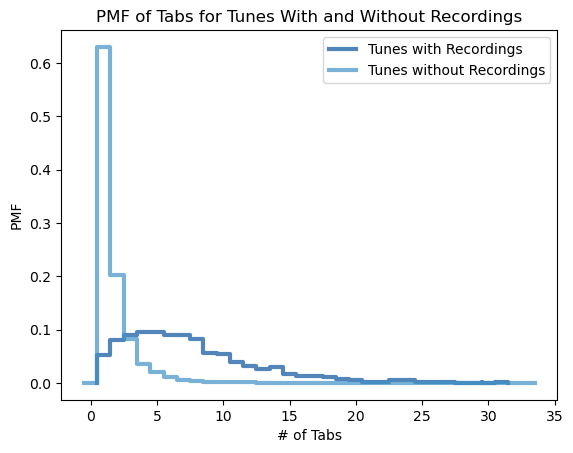

In [19]:
# group1 = tunes[(tunes['type'] == "reel") | (tunes['type'] == "jig")]
# group2 = tunes[(tunes['type'] != "reel") & (tunes['type'] != "jig")]
group1 = tunes[tunes['recordings'] > 0]
group2 = tunes[tunes['recordings'] == 0]

group1_pmf = thinkstats2.Pmf(group1['tabs'], "Tunes with Recordings")
group2_pmf = thinkstats2.Pmf(group2['tabs'], "Tunes without Recordings")

thinkplot.PrePlot(2)
thinkplot.Pmfs([group1_pmf, group2_pmf])
thinkplot.Config(xlabel="# of Tabs", ylabel="PMF", 
                 title='PMF of Tabs for Tunes With and Without Recordings')
plt.show()

### 3. Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

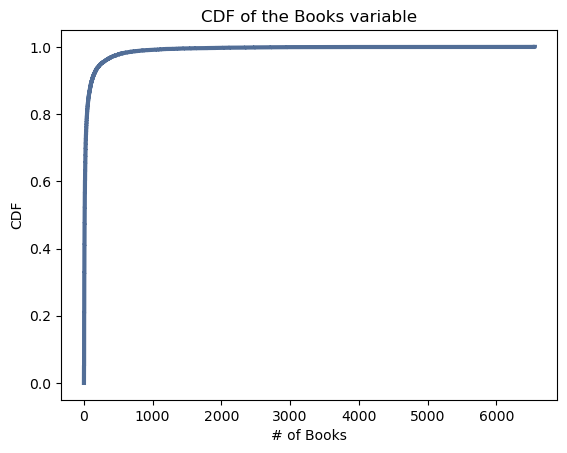

<Figure size 800x600 with 0 Axes>

In [20]:
books_cdf = thinkstats2.Cdf(tunes['books'])
thinkplot.Cdf(books_cdf)
thinkplot.show(ylabel="CDF", xlabel="# of Books", title="CDF of the Books variable")

### 4. Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

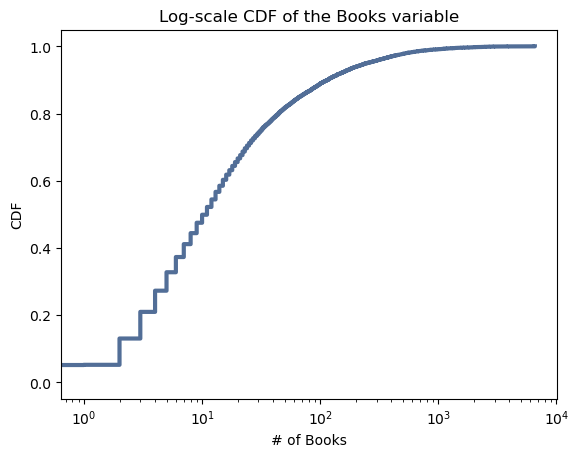

<Figure size 800x600 with 0 Axes>

In [21]:
# Logarithmic scale plot
thinkplot.Cdf(books_cdf)
thinkplot.show(ylabel="CDF", xlabel="# of Books",  xscale='log',
              title="Log-scale CDF of the Books variable")

### 5. Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

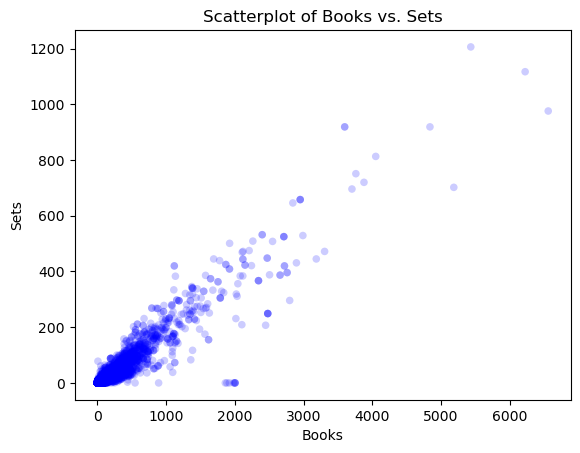

<Figure size 800x600 with 0 Axes>

In [22]:
thinkplot.Scatter(tunes['books'], tunes['sets'])
thinkplot.show(ylabel="Sets", xlabel="Books",
              title="Scatterplot of Books vs. Sets")

In [23]:
p_cor = tunes['books'].corr(tunes['sets'], method='pearson')
s_cor = tunes['books'].corr(tunes['sets'], method='spearman')

print('Correlation between Books and Sets')
print("Pearson's correlation:       ", round(p_cor, 2))
print("Spearman's correlation:      ", round(s_cor, 2))

Correlation between Books and Sets
Pearson's correlation:        0.94
Spearman's correlation:       0.71


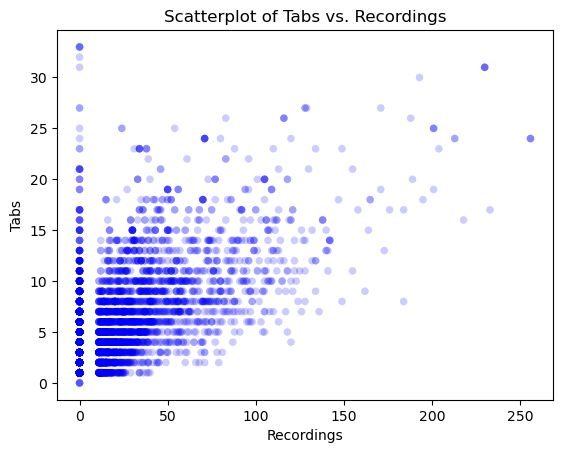

<Figure size 800x600 with 0 Axes>

In [24]:
thinkplot.Scatter(tunes['recordings'], tunes['tabs'])
thinkplot.show(ylabel="Tabs", xlabel="Recordings",
               title="Scatterplot of Tabs vs. Recordings")

In [25]:
p2_cor = tunes['tabs'].corr(tunes['recordings'], method='pearson')
s2_cor = tunes['tabs'].corr(tunes['recordings'], method='spearman')

print('Correlation between Tabs and Recordings')
print("Pearson's correlation:           ", round(p2_cor, 3))
print("Spearman's correlation:          ", round(s2_cor, 3))

Correlation between Tabs and Recordings
Pearson's correlation:            0.701
Spearman's correlation:           0.535


### 6. Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [26]:
# Recreate the author's subclasses of HypothesisTest objects

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
    
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [27]:
def RunTests(tunes_df, iters=1000):
    
    """
    Runs various tests on the tunes dataframe and returns a
    list with the results of those tests.
    """

    # Split the data into Jigs/Reels and other tune types
    jigs_and_reels = tunes_df[(tunes_df['type']=='jig') | (tunes_df['type']=='reel')]
    other_types = tunes_df[(tunes_df['type']!='jig') & (tunes_df['type']!='reel')]

    # Run permutation tests for the mean number of books for each group
    values = jigs_and_reels['books'].values, other_types['books'].values
    hypothesis_test_1 = DiffMeansPermute(values)
    p_prglngth_mean = hypothesis_test_1.PValue(iters=iters)
    
    return p_prglngth_mean



In [28]:
def RunTests(tunes_df, iters=1000):
    
    """
    Runs various tests on the live_births_df dataframe and returns a
    list with the results of those tests.
    """

    # Split the data into Jigs/Reels and other tune types
    jigs_and_reels = tunes_df[(tunes_df['type']=='jig') | (tunes_df['type']=='reel')]
    other_types = tunes_df[(tunes_df['type']!='jig') & (tunes_df['type']!='reel')]

    # Run permutation tests for the mean number of books for each group
    values = jigs_and_reels['books'].values, other_types['books'].values
    hypothesis_test_1 = DiffMeansPermute(values)
    p_mean_diff = hypothesis_test_1.PValue(iters=iters)

    # Run tests for the Correlation between books and tabs
    corr_test = tunes_df.dropna(subset=['books', 'tabs'])
    values = corr_test['books'].values, corr_test['tabs'].values
    hypothesis_test_2 = CorrelationPermute(values)
    p_corr = hypothesis_test_2.PValue(iters=iters)

    # Run tests for the Chi-squared metric of books
    values = jigs_and_reels['books'].values, other_types['books'].values
    hypothesis_test_3 = PregLengthTest(values)
    p_chi_squared = hypothesis_test_3.PValue(iters=iters)
    
    return [
        p_mean_diff,       # the p-value of the mean difference test
#         p_corr,            # the p-value of the correlation test
#         p_chi_squared      # the p-value of the chi_squared test
    ]

In [29]:
RunTests(tunes)

[0.0]

In [30]:
n = len(tunes)

results = [["Sample Size", "P-Value"]]

for _ in range(7):
    sample = thinkstats2.SampleRows(tunes, n)
    result = [n] + RunTests(sample)
    results.append(result)
    n //= 2

C:\Users\dalli\AppData\Local\Temp\ipykernel_25360\2575139148.py:59: RuntimeWarning: invalid value encountered in divide
  stat = sum((observed - expected)**2 / expected)
C:\Users\dalli\AppData\Local\Temp\ipykernel_25360\2575139148.py:59: RuntimeWarning: invalid value encountered in divide
  stat = sum((observed - expected)**2 / expected)


In [31]:
for r in results:
    print(f"{r[0]:>11}{r[1]:>16}")

Sample Size         P-Value
      21990             0.0
      10995             0.0
       5497             0.0
       2748             0.0
       1374             0.0
        687             0.0
        343             0.0


### 7.	For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [32]:
import statsmodels.formula.api as smf

model = smf.ols('books ~ tabs', data=tunes)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  books   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                 1.516e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:32:30   Log-Likelihood:            -1.4251e+05
No. Observations:               21861   AIC:                         2.850e+05
Df Residuals:                   21859   BIC:                         2.850e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.8537      1.446    -37.946      0.000     -57.687     -52.020
tabs          45.7941      0.372    123.138      0.000      45.065      46.523
==============================================================================
Omnibus:                    36379.998   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51369478.147
Skew:                          11.054   Prob(JB):                         0.00
Kurtosis:                     239.447   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""